# Projet Deep Learning

## Imports

In [9]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import json
import pandas as pd


In [2]:
# Vérifier la version de TensorFlow
print("TensorFlow version:", tf.__version__)

# Téléchargement et extraction des données
data_dir = 'Fish.v1-416x416.tensorflow'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

# Analyse exploratoire des données (EDA)
num_train_images = len(os.listdir(train_dir))
num_test_images = len(os.listdir(test_dir))
num_valid_images = len(os.listdir(valid_dir))

print("Nombre d'images dans le dossier d'entraînement:", num_train_images)
print("Nombre d'images dans le dossier de test:", num_test_images)
print("Nombre d'images dans le dossier de validation:", num_valid_images)


TensorFlow version: 2.15.0
Nombre d'images dans le dossier d'entraînement: 945
Nombre d'images dans le dossier de test: 137
Nombre d'images dans le dossier de validation: 271


Exemples d'images dans le dossier d'entraînement:


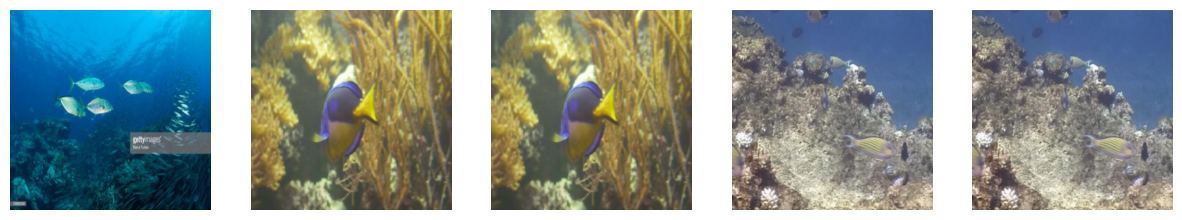

Exemples d'images dans le dossier de test:


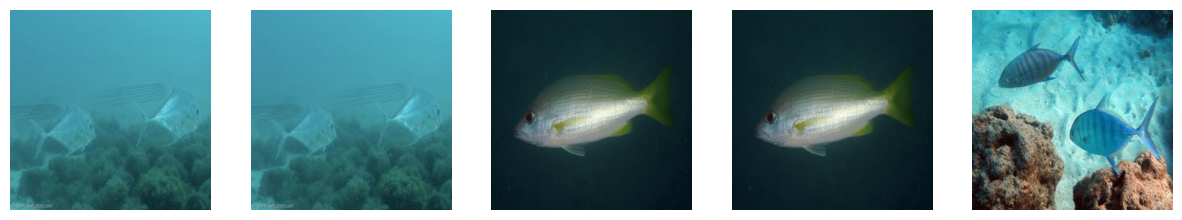

Exemples d'images dans le dossier de validation:


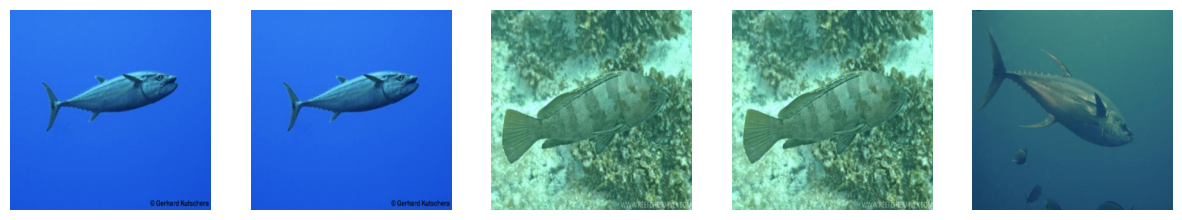

In [5]:
def display_images(directory, num_images=5):
    images = os.listdir(directory)
    num_images = min(num_images, len(images))

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        img_path = os.path.join(directory, images[i])
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

# Afficher des exemples d'images pour chaque ensemble de données
print("Exemples d'images dans le dossier d'entraînement:")
display_images(train_dir)

print("Exemples d'images dans le dossier de test:")
display_images(test_dir)

print("Exemples d'images dans le dossier de validation:")
display_images(valid_dir)


In [24]:
import pandas as pd
import cv2
import os

# Charger les annotations à partir du fichier CSV
annotations_file = '_annotations.csv'
annotations_df = pd.read_csv(os.path.join(train_dir, annotations_file))

# Parcourir les annotations
for index, row in annotations_df.iterrows():
    # Charger l'image correspondante
    image_path = os.path.join(train_dir, row['filename'])
    image = cv2.imread(image_path)

    # Vérifier si l'image a été chargée avec succès
    if image is None:
        print(f"Impossible de charger l'image {row['filename']}")
        continue

    # Récupérer les coordonnées du rectangle annoté
    xmin = int(row['xmin'])
    ymin = int(row['ymin'])
    xmax = int(row['xmax'])
    ymax = int(row['ymax'])

    # Cropper l'image selon le rectangle annoté
    cropped_image = image[ymin:ymax, xmin:xmax]

    # Vérifier si l'image croppée est valide
    if cropped_image.size == 0:
        print(f"Image croppée vide pour l'image {row['filename']}")
        continue

    # Trouver la classe annotée (l'espèce de poisson)
    class_name = row['class']

    # Sauvegarder l'image croppée
    save_dir = os.path.join('cropped_train_images', class_name)
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, row['filename'])
    cv2.imwrite(save_path, cropped_image)


Image croppée vide pour l'image FishDataset554_png.rf.b2XgzOC8YWtCgAaV6mbC.jpg
Image croppée vide pour l'image FishDataset554_png.rf.27536e4740fb6e7e0324302187967adb.jpg
